## 0.Veri Setinin Hazırlanması

In [1]:
#Kullanacağımız kütüphaneleri yükledik.

import numpy as np
import pandas as pd

# Görselleştirme kütüphanesi
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
import os
print(os.listdir("/kaggle/input/crime-trends-and-operations"))


['sexual-violence-in-armed-conflict-dataset-2016-june-21-xlsx-2.csv', 'crime-trends-and-operations-of-criminal-justice-systems-un-cts-csv-1.csv']


In [3]:
# Dataset'e giden yolu belirttik.

df_ = pd.read_csv("/kaggle/input/crime-trends-and-operations/sexual-violence-in-armed-conflict-dataset-2016-june-21-xlsx-2.csv", encoding="ISO-8859-1")
df = df_.copy()



## 1.Veriye İlk Bakış 

In [4]:
#Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,year,actor,actorid,actor_type,conflictid,type,incomp,region,location,gwnoloc,...,public_semipublic,public_private,witness_family,witness_victims,witness_soldiers,witness_other,gang,byproxy,form,Unnamed: 53
0,1989.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
1,1990.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
2,1991.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
3,1992.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
4,1993.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN


In [5]:
#Veri çerçevesinin son 5 gözlemini görüntüleyelim.

df.tail(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,year,actor,actorid,actor_type,conflictid,type,incomp,region,location,gwnoloc,...,public_semipublic,public_private,witness_family,witness_victims,witness_soldiers,witness_other,gang,byproxy,form,Unnamed: 53
7329,2005.0,Tribal Militia,2289.0,6.0,209.0,3.0,2.0,Asia,Pakistan,770.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
7330,2006.0,Tribal Militia,2289.0,6.0,209.0,3.0,2.0,Asia,Pakistan,770.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
7331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Veri çerçevesinin  kaç öznitelik ve kaç gözlemden oluştuğunu görüntülyelim.

df.shape

(7334, 54)

In [7]:
# Veri setindeki kolonları görüntüleyelim.

print(list(df.columns), '\n')

# Toplam kaç adet kolonumuz olduğunu görüntüleyelim.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Fonksiyonun bize hangi tipte veri döndürdüğünü görüntüleyelim.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['year', 'actor', 'actorid', 'actor_type', 'conflictid', 'type', 'incomp', 'region', 'location', 'gwnoloc', 'gwnoloc2', 'gwnoloc3', 'gwnoloc4', 'conflictyear', 'interm', 'postc', 'pgm_id', 'state_prev', 'ai_prev', 'hrw_prev', 'selection', 'selection_ethnicity', 'selection_nationality', 'selection_religion', 'selection_age', 'selection_actor', 'selection_other', 'male', 'child', 'detainee', 'refugee', 'timing', 'timing_month', 'timing_military', 'timing_political', 'timing_errands', 'timing_search', 'location_text', 'location_camp', 'location_checkpoints', 'location_detention', 'location_private', 'location_school', 'public_public', 'public_semipublic', 'public_private', 'witness_family', 'witness_victims', 'witness_soldiers', 'witness_other', 'gang', 'byproxy', 'form', 'Unnamed: 53'] 

Veri seti içerisinde toplam 54 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [8]:
# Veri çerçevesindeki değişkelerin hangi tipte olduğunu ve bellek kullanımı görüntüleyeleim.

df.info

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of         year           actor  actorid  actor_type  conflictid  type  incomp  \
0     1989.0            Iran    630.0         1.0         6.0   3.0     1.0   
1     1990.0            Iran    630.0         1.0         6.0   3.0     1.0   
2     1991.0            Iran    630.0         1.0         6.0   3.0     1.0   
3     1992.0            Iran    630.0         1.0         6.0   3.0     1.0   
4     1993.0            Iran    630.0         1.0         6.0   3.0     1.0   
...      ...             ...      ...         ...         ...   ...     ...   
7329  2005.0  Tribal Militia   2289.0         6.0       209.0   3.0     2.0   
7330  2006.0  Tribal Militia   2289.0         6.0       209.0   3.0     2.0   
7331     NaN             NaN      NaN         NaN         NaN   NaN     NaN   
7332     NaN             NaN      NaN         NaN         NaN   NaN     NaN   
7333     NaN             NaN      NaN         NaN         NaN   NaN     NaN   

           region  

In [9]:
# Her kolonun veri tipini görüntüleyelim.

df.dtypes

year                     float64
actor                     object
actorid                  float64
actor_type               float64
conflictid               float64
type                     float64
incomp                   float64
region                    object
location                  object
gwnoloc                  float64
gwnoloc2                 float64
gwnoloc3                 float64
gwnoloc4                 float64
conflictyear             float64
interm                   float64
postc                    float64
pgm_id                   float64
state_prev               float64
ai_prev                  float64
hrw_prev                 float64
selection                float64
selection_ethnicity       object
selection_nationality     object
selection_religion        object
selection_age             object
selection_actor           object
selection_other           object
male                     float64
child                    float64
detainee                 float64
refugee   

In [10]:
# Veri çerçevesindeki  sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.
# Standart sapma ve ortalama değerlerlerinden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.
# Varyans : Standart sapmanın karesi ve birimsiz halidir.

df.describe().T

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,count,mean,std,min,25%,50%,75%,max
year,7331.0,1999.362570,5.894112,1989.0,1994.0,1999.0,2004.0,2009.0
actorid,7331.0,1326.219479,856.338766,2.0,630.0,1170.0,2084.0,3302.0
actor_type,7331.0,3.448779,1.879578,1.0,2.0,3.0,6.0,6.0
conflictid,7331.0,136.889237,62.505240,6.0,92.0,137.0,190.0,263.0
type,7331.0,3.290820,0.541330,2.0,3.0,3.0,4.0,4.0
incomp,7331.0,1.608512,0.496430,0.0,1.0,2.0,2.0,2.0
gwnoloc,7331.0,567.385623,222.251554,2.0,451.0,625.0,750.0,910.0
gwnoloc2,7331.0,25.340063,128.335933,0.0,0.0,0.0,0.0,770.0
gwnoloc3,7331.0,0.654754,11.425404,0.0,0.0,0.0,0.0,200.0
gwnoloc4,7331.0,0.006548,0.114254,0.0,0.0,0.0,0.0,2.0


## 2.Eksik Veri Analizi


Eksik veri analizi, veri setindeki eksik değerlerin tespit edilip uygun yöntemlerle düzeltilmesini amaçlar. Veri setinde eksik değerlerin bulunması, yapısal bir bozukluğa işaret edebilir ve bu durum dikkatle ele alınmalıdır. Eksik verilerin ortaya çıkma sebepleri titizlikle incelenmeli ve bu analiz sonucu, eksik verilerin nasıl işleneceği konusunda doğru bir yaklaşım benimsenmelidir.

## 2.1 Eksik Veirlerin Gözlemlenmesi

In [11]:
# Veri setinde kaç adet eksik değer olduğunu gözlemleyelim.

df.isna().sum()

year                        3
actor                       3
actorid                     3
actor_type                  3
conflictid                  3
type                        3
incomp                      3
region                      3
location                    3
gwnoloc                     3
gwnoloc2                    3
gwnoloc3                    3
gwnoloc4                    3
conflictyear                3
interm                      3
postc                       3
pgm_id                      3
state_prev                 13
ai_prev                    13
hrw_prev                   13
selection                  13
selection_ethnicity         3
selection_nationality       3
selection_religion          3
selection_age               3
selection_actor             3
selection_other             3
male                       13
child                      13
detainee                   13
refugee                    13
timing                      3
timing_month                3
timing_mil

In [12]:
# Veri setinde toplam kaç adet eksik değer olduğunu gözlemleyelim.

df.isna().sum().sum()

7743

In [13]:
# Veri setindeki eksik olmayan değerleri görüntüleyelim.
df.notnull().sum()

year                     7331
actor                    7331
actorid                  7331
actor_type               7331
conflictid               7331
type                     7331
incomp                   7331
region                   7331
location                 7331
gwnoloc                  7331
gwnoloc2                 7331
gwnoloc3                 7331
gwnoloc4                 7331
conflictyear             7331
interm                   7331
postc                    7331
pgm_id                   7331
state_prev               7321
ai_prev                  7321
hrw_prev                 7321
selection                7321
selection_ethnicity      7331
selection_nationality    7331
selection_religion       7331
selection_age            7331
selection_actor          7331
selection_other          7331
male                     7321
child                    7321
detainee                 7321
refugee                  7321
timing                   7331
timing_month             7331
timing_mil

In [14]:
# Toplamda veri setindeki eksik gözlemleri ve eksik olmayan gözlemleri görüntüleyelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 388293 adet eksik olmayan, 7743 eksik gözlem var.


In [15]:
# En az bir gözlemii eksik olan kayıtları görüntüleyelim.
df[df.isnull().any(axis = 1)][:5]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,year,actor,actorid,actor_type,conflictid,type,incomp,region,location,gwnoloc,...,public_semipublic,public_private,witness_family,witness_victims,witness_soldiers,witness_other,gang,byproxy,form,Unnamed: 53
0,1989.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
1,1990.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
2,1991.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
3,1992.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN
4,1993.0,Iran,630.0,1.0,6.0,3.0,1.0,Middle East,Iran,630.0,...,0.0,0.0,0.0,0.0,0.0,-99,0.0,0.0,-99,NaN


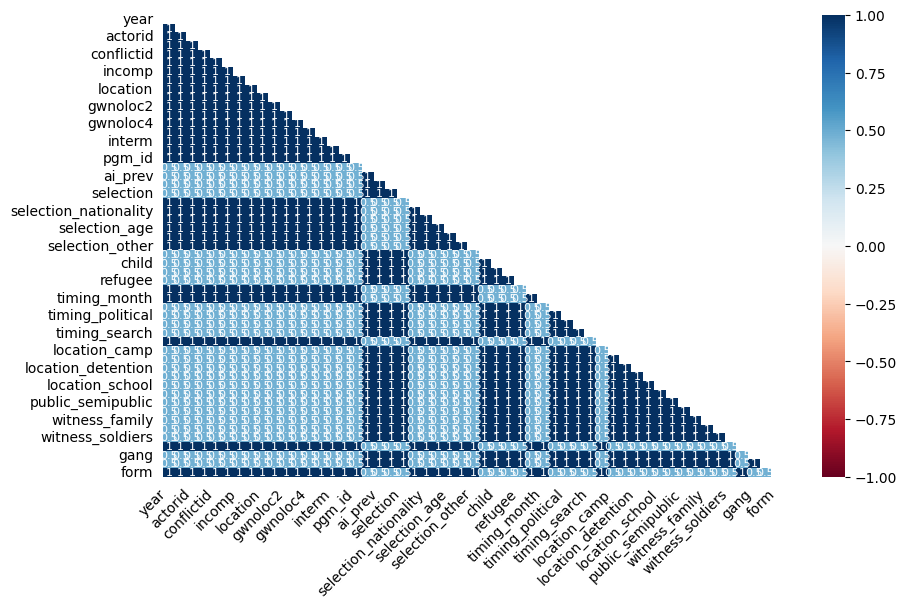

In [16]:
# Kolonlar arasıdaki eksik verilerin ilişkisini görselleştirerek heatmapte inceleyelim.
# Nullity Correlation (Heatmap)
# Değer 1'e ne kadar yakınsa eksik değerlerin birbirleriyle ilişkili ihtimali o kadar yükselir.

msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

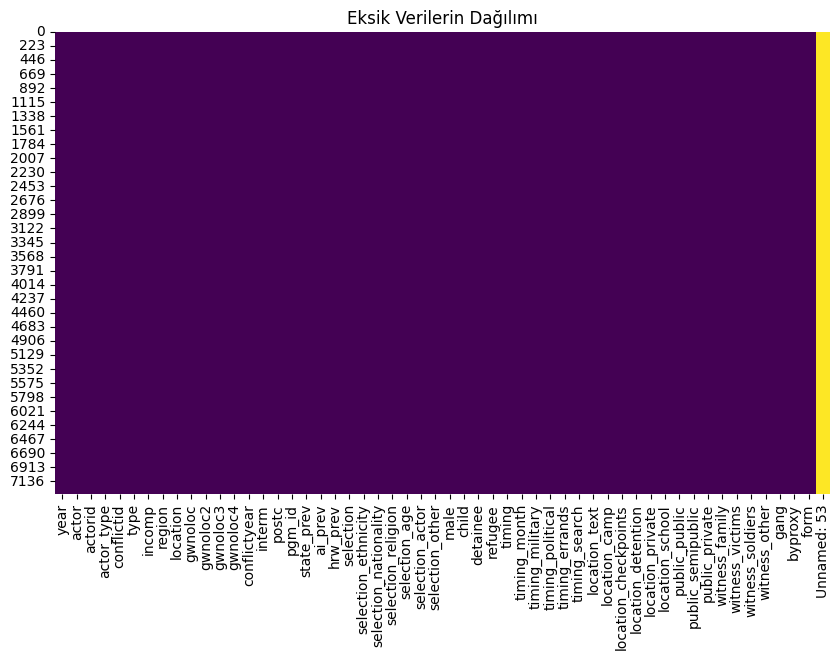

In [17]:
 # Eksik değerlerin dağılımını anlamak amacıyla görsel olarak inceleyelim.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Verilerin Dağılımı")
plt.show()

In [18]:
# Eksik veri oranlarını tablo şeklide gösterelim.Bu şekilde eksik veri oranlarından yola çıkarak eksik 
# verlerilerle nasıl ilerleyeceğimize karar verebilriz.

import pandas as pd

# Verilerinizi içeren DataFrame 'df' olduğu varsayılıyor

# Eksik veri oranlarını hesaplayalım
missing_data = df.isna().mean() * 100

# Gruplama fonksiyonu
def categorize_missing_data(rate):
    if rate < 5:
        return "Düşük oran"
    elif 5 <= rate < 35:
        return "Yüksek oran"
    else:
        return "Çok yüksek oran"

# Yeni DataFrame oluşturalım
missing_data_summary = pd.DataFrame({
    'Sütun Adı': missing_data.index,
    'Eksik Veri Oranı (%)': missing_data.values,
})

# Eksik veri oranına göre gruplama ekleyelim
missing_data_summary['Gruplama'] = missing_data_summary['Eksik Veri Oranı (%)'].apply(categorize_missing_data)

# Sonuçları görüntüleyelim
print(missing_data_summary)

                Sütun Adı  Eksik Veri Oranı (%)         Gruplama
0                    year              0.040905       Düşük oran
1                   actor              0.040905       Düşük oran
2                 actorid              0.040905       Düşük oran
3              actor_type              0.040905       Düşük oran
4              conflictid              0.040905       Düşük oran
5                    type              0.040905       Düşük oran
6                  incomp              0.040905       Düşük oran
7                  region              0.040905       Düşük oran
8                location              0.040905       Düşük oran
9                 gwnoloc              0.040905       Düşük oran
10               gwnoloc2              0.040905       Düşük oran
11               gwnoloc3              0.040905       Düşük oran
12               gwnoloc4              0.040905       Düşük oran
13           conflictyear              0.040905       Düşük oran
14                 interm

Bu yaptığımız görselleştirmeler bize hangi veri ne kadar eksik, eksik değerlerin dağılımı nasıl ilerliyor ve bu eksik verilere karşı bizim nasıl ilerlememez gerektiğini analiz ediyor ve bu konuyla alakalı fikir veriyor.

## 2.2 Eksik Verilerin Silinmesi

In [19]:
# Bu sütun tamamen eksik olduğundan ve hepsinin doldurulması durumunda analizlerde yanıltıcı olabileceğinden tamamen kaldırdım.
df.drop(columns=['Unnamed: 53'], inplace=True)

In [20]:
# Kategorik değişkenleri en sık görülen değer (mod) ile dolduralım.

categorical_columns = ['actor', 'region', 'selection', 'selection_ethnicity', 
                       'selection_nationality', 'selection_religion', 'selection_age', 
                       'selection_actor', 'selection_other', 'male', 'child', 
                       'detainee', 'refugee', 'timing', 'timing_month', 'timing_military',
                       'timing_political', 'timing_errands', 'timing_search', 
                       'location_text', 'location_camp', 'location_checkpoints', 
                       'location_detention', 'location_private', 'location_school', 
                       'public_public', 'public_semipublic', 'public_private', 
                       'witness_family', 'witness_victims', 'witness_soldiers', 
                       'witness_other', 'gang', 'byproxy', 'form']

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-20-9647a84b51fd>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [21]:
df = df.dropna(axis=1, how='all')

# Sayısal ve kategorik verilerde eksik verileri dolduralım.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print(df.isna().sum())

# Her sütundaki boş (NaN) verilerin oranını hesaplayalım.
missing_data_percentage = df.isnull().mean() * 100

# Boş veri oranını gösterir.
print(missing_data_percentage)

year                     0
actor                    0
actorid                  0
actor_type               0
conflictid               0
type                     0
incomp                   0
region                   0
location                 0
gwnoloc                  0
gwnoloc2                 0
gwnoloc3                 0
gwnoloc4                 0
conflictyear             0
interm                   0
postc                    0
pgm_id                   0
state_prev               0
ai_prev                  0
hrw_prev                 0
selection                0
selection_ethnicity      0
selection_nationality    0
selection_religion       0
selection_age            0
selection_actor          0
selection_other          0
male                     0
child                    0
detainee                 0
refugee                  0
timing                   0
timing_month             0
timing_military          0
timing_political         0
timing_errands           0
timing_search            0
l

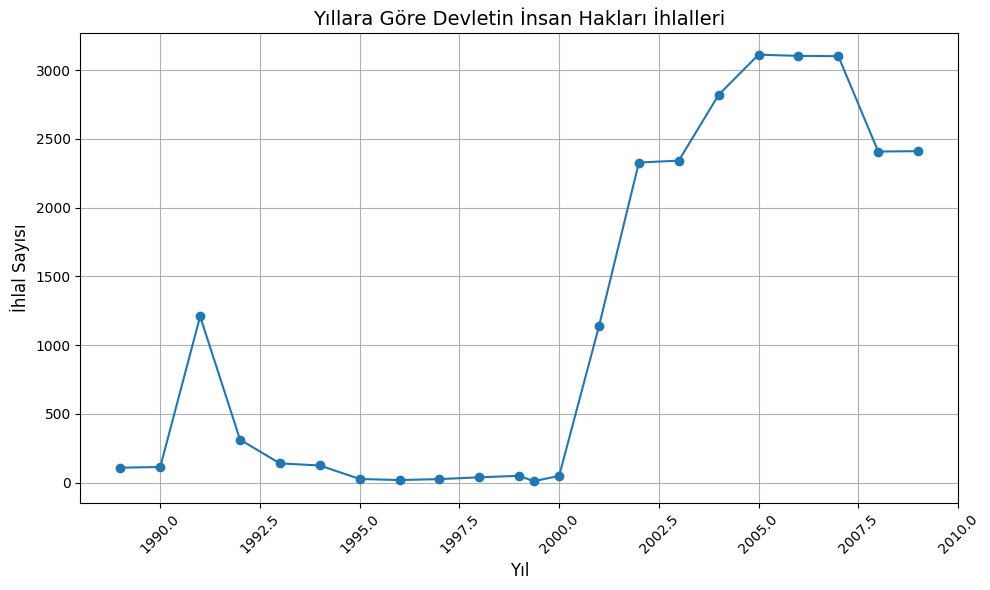

In [22]:

df['state_prev'] = df['state_prev'].abs()  

df.groupby('year')['state_prev'].sum().plot(kind='line', marker='o', figsize=(10,6))

plt.title('Yıllara Göre Devletin İnsan Hakları İhlalleri', fontsize=14)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('İhlal Sayısı', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()


In [23]:
from tabulate import tabulate

# DataFrame'e çevirerek tabulate ile daha düzenli yazdır
region_violations_df = region_violations.reset_index()
print(tabulate(region_violations_df, headers=["Bölge", "İhlal Sayısı"], tablefmt="grid"))


NameError: name 'region_violations' is not defined

In [ ]:
region_violations = df.groupby('region')['state_prev'].sum().sort_values(ascending=False)
region_violations.plot(kind='bar', figsize=(10,6), color='lightcoral')
plt.title('Bölgelere Göre Devletin İnsan Hakları İhlalleri')
plt.xlabel('Bölge')
plt.ylabel('İhlal Sayısı')
plt.xticks(rotation=45)
plt.show()

In [ ]:

gocmenler_bolge_ihlali = df[df['refugee'] == 1].groupby('region')['state_prev'].sum().sort_values(ascending=False)

gocmenler_bolge_ihlali.plot(kind='bar', figsize=(12,6), color='purple')
plt.title('Bölgelere Göre Göçmen Hak İhlalleri')
plt.xlabel('Bölge')
plt.ylabel('İhlal Sayısı')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.groupby('year')['child'].sum().plot(kind='line', marker='o', figsize=(10,6), color='green')
plt.title('Yıllara Göre Çocukların Suça Karışma Oranı')
plt.xlabel('Yıl')
plt.ylabel('Suça Karışan Çocuk Sayısı')
plt.grid(True)
plt.show()

In [ ]:
region_state_data = df.groupby(['region'])['state_prev'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
region_state_data.plot(kind='bar', stacked=True, color=['#4C9F70', '#F2A900', '#D43F00'], figsize=(12, 6))
plt.title('Devletin İhlallerine Yaklaşımın Bölgelere Göre Dağılımı', fontsize=16)
plt.xlabel('Bölge', fontsize=12)
plt.ylabel('İhlal Durumu Sayısı', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Devlet Yaklaşımı', labels=['İhlalleri Kabul Etme', 'Engelleme', 'Kayıtsız Kalma'], loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

crime_labels = {
    2: "Cinsel İşkence",
    3: "Tecavüz",
    4: "Ağır Kombinasyon Suçları"
}

crime_counts = df['type'].value_counts()

# Suç türü ID'lerini açıklamalı hale getir
crime_counts.index = crime_counts.index.map(lambda x: crime_labels.get(x, x))

plt.figure(figsize=(10, 6))
sns.barplot(x=crime_counts.index, y=crime_counts.values, palette="coolwarm")

plt.title("Suç Türlerine Göre Dağılım", fontsize=14, fontweight="bold")
plt.xlabel("Suç Türü", fontsize=12)
plt.ylabel("Olay Sayısı", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
location_crime_count = df['location'].value_counts()
location_crime_count.plot(kind='barh', figsize=(20, 15), color='lightgreen')
plt.title("Lokasyona Göre Suç Sayısı")
plt.xlabel("Suç Sayısı")
plt.ylabel("Konum")
plt.show()



In [ ]:
import seaborn as sns

# Suç türlerini etiketle
crime_type_labels = {2.0: 'Tecavüz', 3.0: 'Ağır Kombinasyon Suçları', 4.0: 'Cinsel İşkence'}
crime_by_year = df.groupby(['year', 'type']).size().unstack().fillna(0)

# Suç türlerini değiştirmek
crime_by_year = crime_by_year.rename(columns=crime_type_labels)

plt.figure(figsize=(12, 8))
sns.heatmap(crime_by_year, cmap='coolwarm', annot=True, fmt='d')
plt.title("Yıla Göre Suç Türleri")
plt.xlabel("Suç Türü")
plt.ylabel("Yıl")
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df['year'].dropna(), bins=30, kde=True)
plt.xlabel("Yıl")
plt.ylabel("Olay Sayısı")
plt.title("Yıllara Göre Olay Dağılımı")
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['region'], order=df['region'].value_counts().index, palette="coolwarm")
plt.xlabel("Olay Sayısı")
plt.ylabel("Bölge")
plt.title("Bölgelere Göre Olay Sayıları")
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
df['location'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel("Ülke")
plt.ylabel("Olay Sayısı")
plt.title("En Çok Olay Yaşanan Ülkeler")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# En çok olayın yaşandığı aktörler (ülke veya grup)
print(df['actor'].value_counts().head(10))

# Aktörlere göre olay sayısını çizen grafik
plt.figure(figsize=(12,6))
df['actor'].value_counts().head(10).plot(kind='bar', color='red')
plt.xlabel("Aktör")
plt.ylabel("Olay Sayısı")
plt.title("En Fazla Şiddet Uygulayan Aktörler")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Yıla göre toplam ihlal sayısını hesapla
time_series = df.groupby('year')['state_prev'].sum()

# ARIMA modeli eğitme (p, d, q değerlerini optimize edebilirsin)
model = ARIMA(time_series, order=(2,1,2))
model_fit = model.fit()

# Gelecekteki 5 yılı tahmin etme
forecast = model_fit.forecast(steps=5)
print(forecast)
